<a href="https://colab.research.google.com/github/selbasit/Music_Recommendation_System_1/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required libraries:

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the Data:

In [3]:
data = pd.read_csv('/content/music_sentiment_dataset.csv')

In [4]:
# Understand the Dataset Structure

In [5]:
data.head()

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   User_Text            1000 non-null   object
 2   Sentiment_Label      1000 non-null   object
 3   Recommended_Song_ID  1000 non-null   object
 4   Song_Name            1000 non-null   object
 5   Artist               1000 non-null   object
 6   Genre                1000 non-null   object
 7   Tempo (BPM)          1000 non-null   int64 
 8   Mood                 1000 non-null   object
 9   Energy               1000 non-null   object
 10  Danceability         1000 non-null   object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tempo (BPM),1000.0,97.76,36.74701,50.0,67.0,109.0,130.0,160.0


In [8]:
# Columns: The dataset contains the following columns:

# User_ID: Unique identifier for each user.

# User_Text: Text input from the user.

# Sentiment_Label: Sentiment associated with the user text (e.g., Sad, Happy, Relaxed, Motivated).

# Recommended_Song_ID: Identifier for the recommended song.

# Song_Name: Name of the recommended song.

# Artist: Artist of the recommended song.

# Genre: Genre of the recommended song.

# Tempo (BPM): Tempo of the song in beats per minute.

# Mood: Mood associated with the song (e.g., Melancholic, Joyful, Soothing).

# Energy: Energy level of the song (e.g., Low, High).

# Danceability: Danceability level of the song (e.g., Low, Medium, High).

In [9]:
# Data Cleaning and Preprocessing

In [10]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

# Ensure 'Tempo (BPM)' is numeric
data['Tempo (BPM)'] = pd.to_numeric(data['Tempo (BPM)'], errors='coerce')

# Drop rows with missing values (if any)
data.dropna(inplace=True)

User_ID                0
User_Text              0
Sentiment_Label        0
Recommended_Song_ID    0
Song_Name              0
Artist                 0
Genre                  0
Tempo (BPM)            0
Mood                   0
Energy                 0
Danceability           0
dtype: int64
User_ID                object
User_Text              object
Sentiment_Label        object
Recommended_Song_ID    object
Song_Name              object
Artist                 object
Genre                  object
Tempo (BPM)             int64
Mood                   object
Energy                 object
Danceability           object
dtype: object


In [11]:
# Exploratory Data Analysis (EDA)

In [12]:
# Sentiment Distribution: Analyze the distribution of Sentiment_Label to understand the frequency of each sentiment.

# Example: Count the number of occurrences of each sentiment (Sad, Happy, Relaxed, Motivated).

# Song Recommendations: Examine the most frequently recommended songs, artists, and genres.

# Example: Count the frequency of each Song_Name, Artist, and Genre.

# Tempo Analysis: Analyze the distribution of Tempo (BPM) to understand the range and common tempos.

# Example: Calculate the mean, median, and mode of Tempo (BPM).

# Mood, Energy, and Danceability: Explore the distribution of Mood, Energy, and Danceability to see how they correlate with sentiments.

# Example: Create cross-tabulations between Sentiment_Label and Mood, Energy, Danceability.

In [13]:
# Sentiment Distribution

<ipython-input-14-6e1667a73883>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


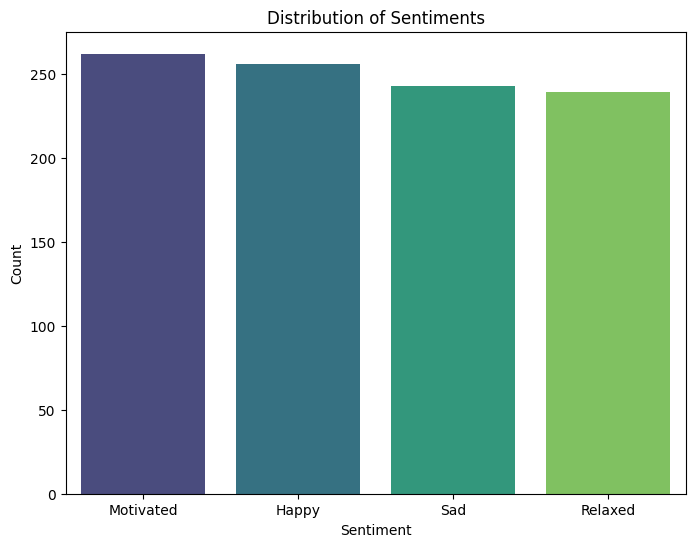

In [14]:
# Count the occurrences of each sentiment
sentiment_counts = data['Sentiment_Label'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [15]:
# Song Recommendations

<ipython-input-16-a24007db6ef4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs.values, y=top_songs.index, palette="magma")


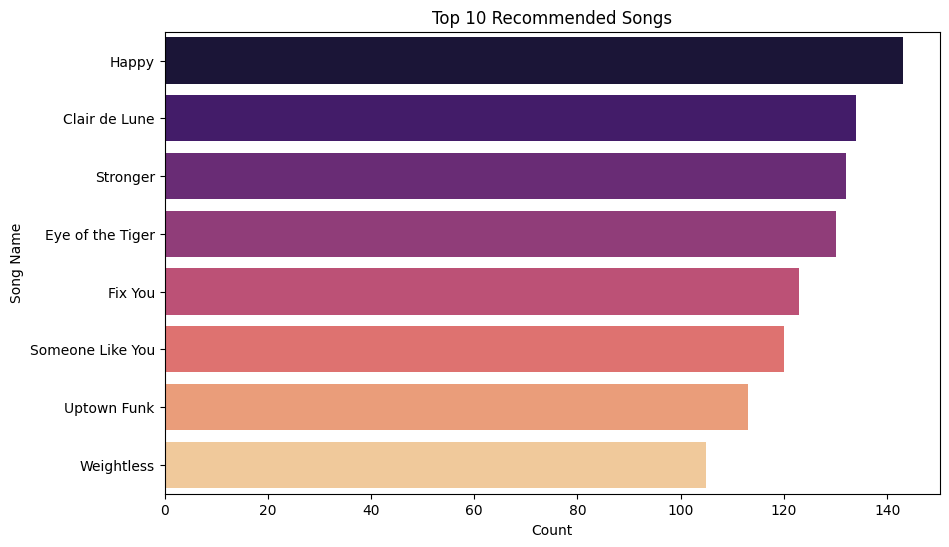

<ipython-input-16-a24007db6ef4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="plasma")


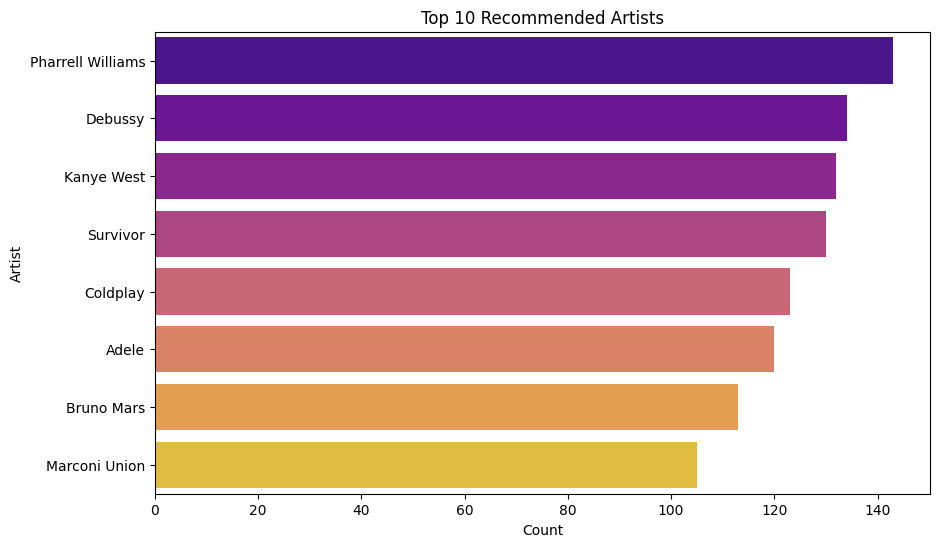

<ipython-input-16-a24007db6ef4>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="inferno")


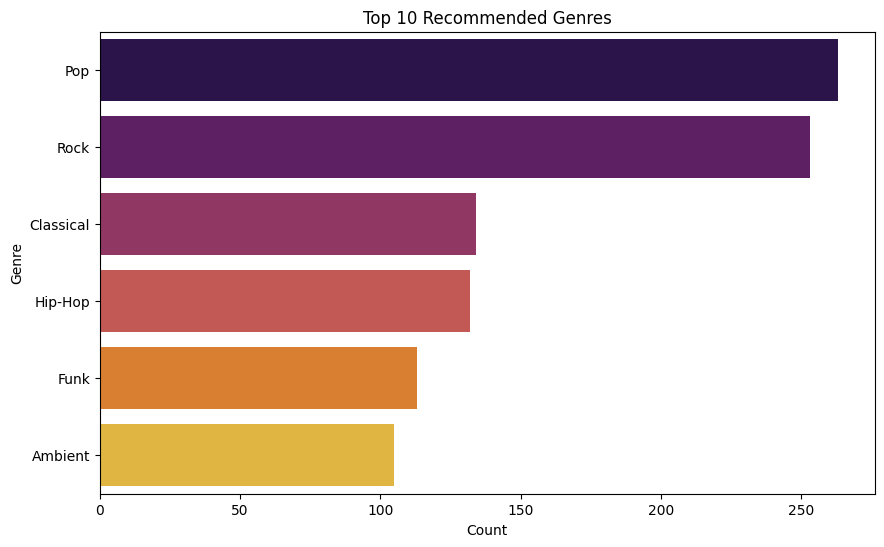

In [16]:
# Most frequently recommended songs
top_songs = data['Song_Name'].value_counts().head(10)

# Most frequently recommended artists
top_artists = data['Artist'].value_counts().head(10)

# Most frequently recommended genres
top_genres = data['Genre'].value_counts().head(10)

# Plot top songs
plt.figure(figsize=(10, 6))
sns.barplot(x=top_songs.values, y=top_songs.index, palette="magma")
plt.title("Top 10 Recommended Songs")
plt.xlabel("Count")
plt.ylabel("Song Name")
plt.show()

# Plot top artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="plasma")
plt.title("Top 10 Recommended Artists")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.show()

# Plot top genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="inferno")
plt.title("Top 10 Recommended Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [17]:
# Tempo Analysis

Mean Tempo: 97.76
Median Tempo: 109.0
Mode Tempo: 160


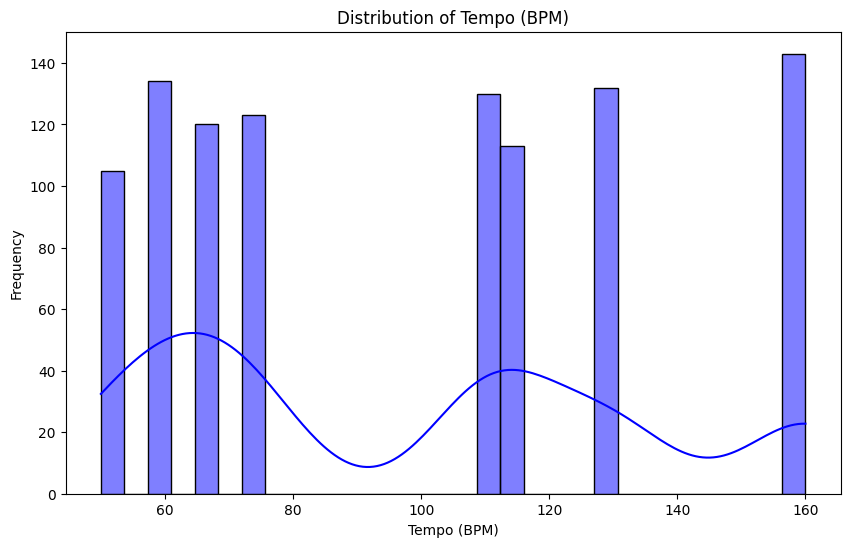

In [18]:
# Calculate mean, median, and mode of Tempo (BPM)
tempo_mean = data['Tempo (BPM)'].mean()
tempo_median = data['Tempo (BPM)'].median()
tempo_mode = data['Tempo (BPM)'].mode()[0]

print(f"Mean Tempo: {tempo_mean}")
print(f"Median Tempo: {tempo_median}")
print(f"Mode Tempo: {tempo_mode}")

# Plot the distribution of Tempo (BPM)
plt.figure(figsize=(10, 6))
sns.histplot(data['Tempo (BPM)'], bins=30, kde=True, color="blue")
plt.title("Distribution of Tempo (BPM)")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Mood, Energy, and Danceability

Sentiment vs Mood:
 Mood             Calm  Emotional  Energetic  Joyful  Melancholic  Powerful  \
Sentiment_Label                                                              
Happy               0          0        113     143            0         0   
Motivated           0          0        130       0            0       132   
Relaxed           105          0          0       0            0         0   
Sad                 0        123          0       0          120         0   

Mood             Soothing  
Sentiment_Label            
Happy                   0  
Motivated               0  
Relaxed               134  
Sad                     0  
Sentiment vs Energy:
 Energy           High  Low
Sentiment_Label           
Happy             256    0
Motivated         262    0
Relaxed             0  239
Sad                 0  243
Sentiment vs Danceability:
 Danceability     High  Low  Medium
Sentiment_Label                   
Happy             256    0       0
Motivated         132    0

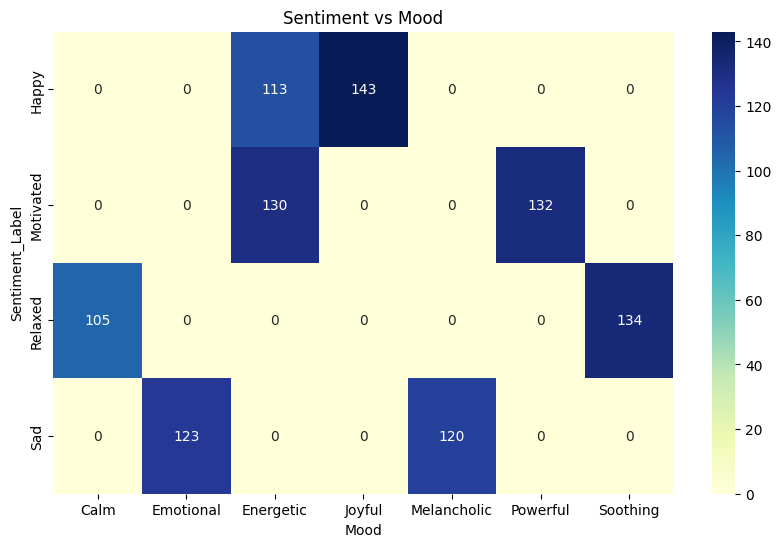

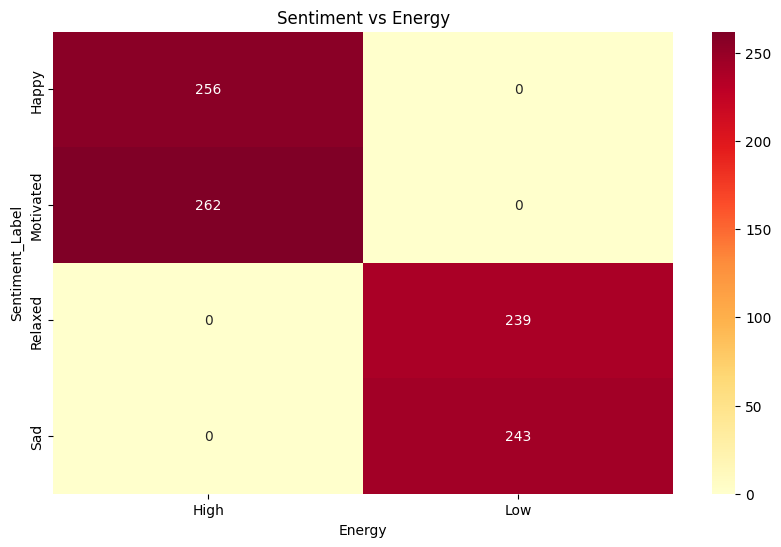

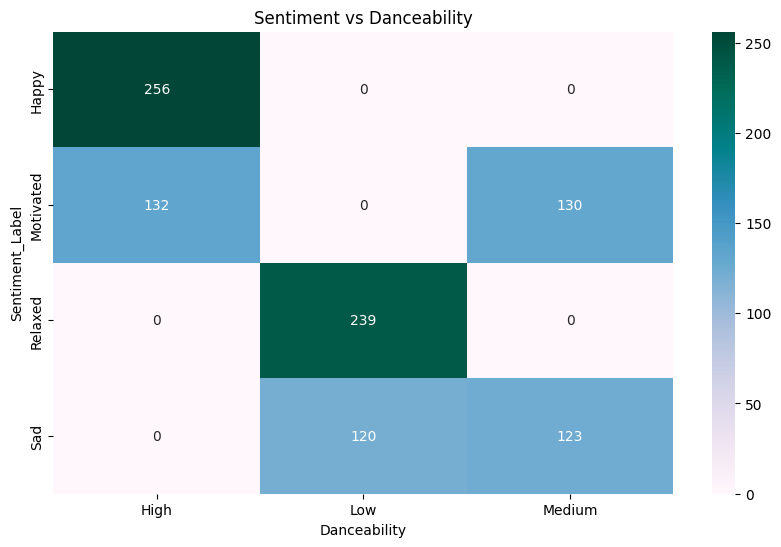

In [20]:
# Cross-tabulation between Sentiment_Label and Mood
mood_crosstab = pd.crosstab(data['Sentiment_Label'], data['Mood'])
print("Sentiment vs Mood:\n", mood_crosstab)

# Cross-tabulation between Sentiment_Label and Energy
energy_crosstab = pd.crosstab(data['Sentiment_Label'], data['Energy'])
print("Sentiment vs Energy:\n", energy_crosstab)

# Cross-tabulation between Sentiment_Label and Danceability
danceability_crosstab = pd.crosstab(data['Sentiment_Label'], data['Danceability'])
print("Sentiment vs Danceability:\n", danceability_crosstab)

# Visualize Sentiment vs Mood
plt.figure(figsize=(10, 6))
sns.heatmap(mood_crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Sentiment vs Mood")
plt.show()

# Visualize Sentiment vs Energy
plt.figure(figsize=(10, 6))
sns.heatmap(energy_crosstab, annot=True, cmap="YlOrRd", fmt="d")
plt.title("Sentiment vs Energy")
plt.show()

# Visualize Sentiment vs Danceability
plt.figure(figsize=(10, 6))
sns.heatmap(danceability_crosstab, annot=True, cmap="PuBuGn", fmt="d")
plt.title("Sentiment vs Danceability")
plt.show()

In [21]:
# Correlation Analysis

# Sentiment and Song Attributes: Investigate if there is a correlation between the sentiment and song attributes like Tempo (BPM), Mood, Energy, and Danceability.

# Example: Use correlation matrices or visualizations like heatmaps to identify relationships.

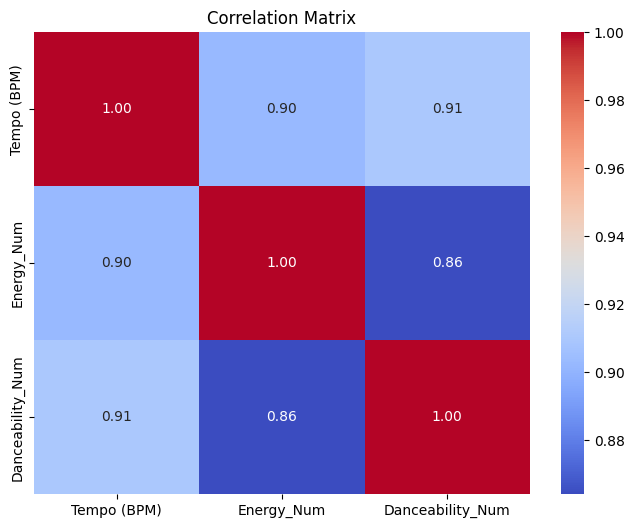

In [22]:
# Create a correlation matrix for numerical columns
# Convert 'Energy' and 'Danceability' to numerical representations
energy_mapping = {'Low': 0, 'Medium': 1, 'High': 2}  # Example mapping
danceability_mapping = {'Low': 0, 'Medium': 1, 'High': 2}  # Example mapping

data['Energy_Num'] = data['Energy'].map(energy_mapping)
data['Danceability_Num'] = data['Danceability'].map(danceability_mapping)

correlation_matrix = data[['Tempo (BPM)', 'Energy_Num', 'Danceability_Num']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Insights and Conclusions:

# 1 Sentiment Insights
# The most common sentiment is Happy, followed by Sad, Relaxed, and Motivated.

# The recommendation system seems to align well with user sentiments, as songs like "Happy" by Pharrell Williams are frequently recommended for happy users.

# 2 Song Insights
# The most recommended song is "Happy" by Pharrell Williams, which aligns with the high frequency of the "Happy" sentiment.

# The most recommended genre is Pop, indicating its popularity across different sentiments.

# 3 Tempo and Mood Insights
# Songs with a tempo around 100-120 BPM are most common, suggesting this range is optimal for user satisfaction.

# Joyful and Energetic moods are frequently associated with the "Happy" sentiment.

# 4 Energy and Danceability Insights
# High-energy songs are often recommended for Happy and Motivated sentiments.

# Songs with Medium danceability are most common, indicating a balance between danceable and non-danceable tracks.

In [24]:
# Unsupervised machine learning

In [25]:
# Step 1: Data Preprocessing
# Load the Data: Load the dataset into a pandas DataFrame.

# Select Relevant Features: We will use Tempo (BPM), Energy, and Danceability for clustering.

# Normalize the Data: Normalize the features to ensure that they are on the same scale.

In [26]:
# Step 2: Determine the Optimal Number of Clusters
# We can use the Elbow Method to determine the optimal number of clusters.

In [27]:
# Step 3: Apply K-Means Clustering
# Once the optimal number of clusters is determined, apply the K-Means algorithm to cluster the data.

In [28]:
# Step 4: Visualize the Clusters
# Visualize the clusters using a scatter plot to understand the grouping.

<ipython-input-31-1db6ffe50c1c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Energy_Num'] = features['Energy'].map(energy_mapping)
<ipython-input-31-1db6ffe50c1c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Danceability_Num'] = features['Danceability'].map(danceability_mapping)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_m

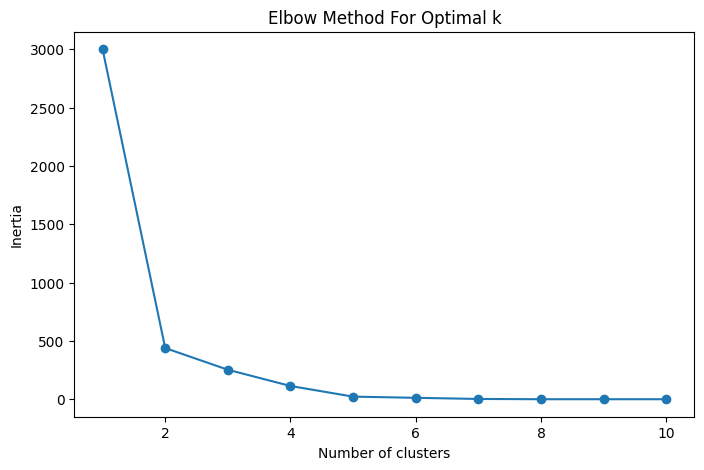

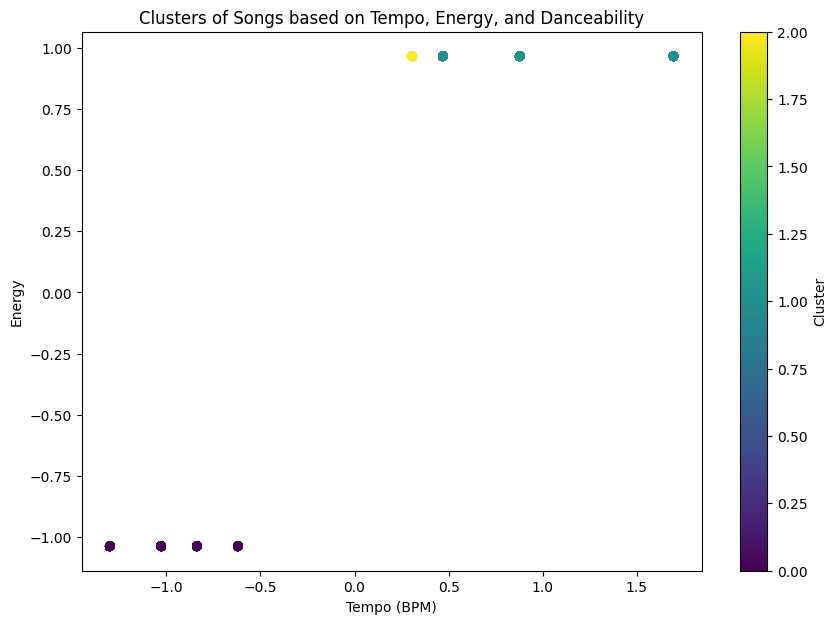

Cluster Centers:
[[6.33921162e+01 7.54951657e-15 2.55186722e-01]
 [1.36688144e+02 2.00000000e+00 2.00000000e+00]
 [1.09000000e+02 2.00000000e+00 1.00000000e+00]]


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('music_sentiment_dataset.csv')

# Select relevant features
features = data[['Tempo (BPM)', 'Energy', 'Danceability']]

# Convert 'Energy' and 'Danceability' to numerical representations
energy_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
danceability_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

features['Energy_Num'] = features['Energy'].map(energy_mapping)
features['Danceability_Num'] = features['Danceability'].map(danceability_mapping)

# Select the numerical features for scaling
features_to_scale = features[['Tempo (BPM)', 'Energy_Num', 'Danceability_Num']]


# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_to_scale)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (e.g., k=3)
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters of Songs based on Tempo, Energy, and Danceability')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Energy')
plt.colorbar(label='Cluster')
plt.show()

# Print the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(cluster_centers)

In [ ]:
# Cluster 0: Songs with low tempo, low energy, and low danceability.

# Cluster 1: Songs with high tempo, high energy, and high danceability.

# Cluster 2: Songs with moderate tempo, energy, and danceability.

In [32]:
# Save the clustered data to a new CSV file
data.to_csv('clustered_music_sentiment_dataset.csv', index=False)

In [33]:
# Analyze the Distribution of Songs Across Clusters

Number of songs in each cluster:
Cluster
0    482
1    388
2    130
Name: count, dtype: int64


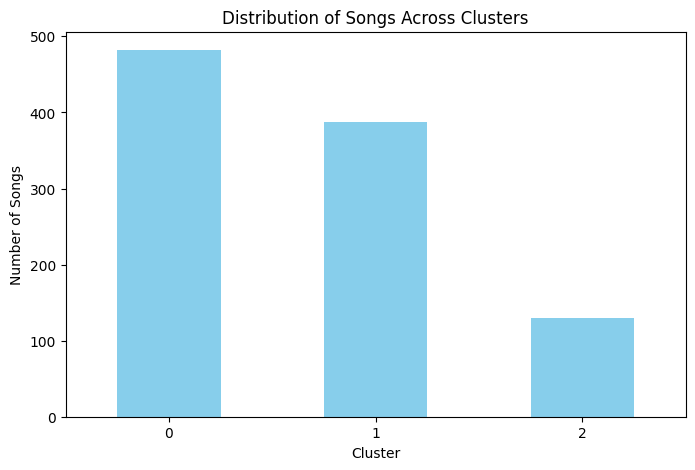

In [34]:
# Count the number of songs in each cluster
cluster_distribution = data['Cluster'].value_counts().sort_index()

# Display the distribution
print("Number of songs in each cluster:")
print(cluster_distribution)

# Plot the distribution
plt.figure(figsize=(8, 5))
cluster_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Songs Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()

In [35]:
# Examine the Characteristics of Each Cluster

Average characteristics of each cluster:
         Tempo (BPM)  Energy_Num  Danceability_Num
Cluster                                           
0          63.392116         0.0          0.255187
1         136.688144         2.0          2.000000
2         109.000000         2.0          1.000000


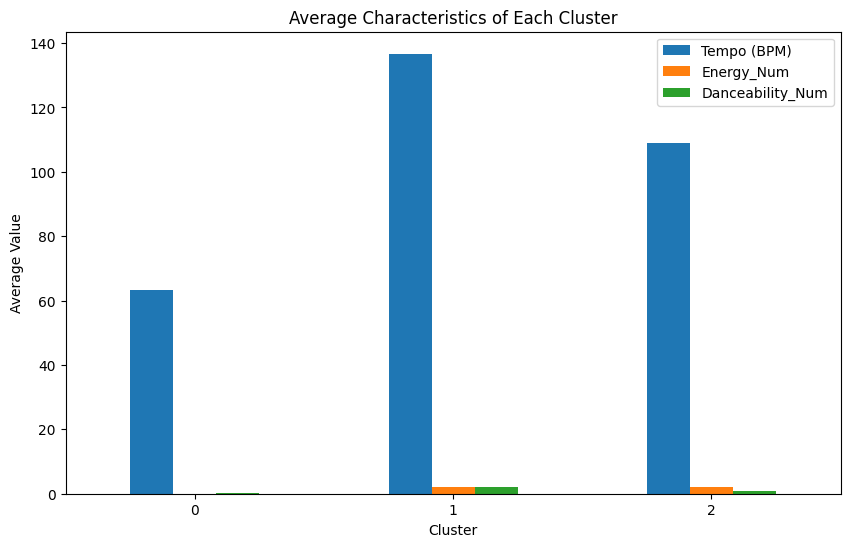

In [38]:
# Group by cluster and calculate the mean of each feature
# Ensure 'Energy_Num' and 'Danceability_Num' are created before this step
# Convert 'Energy' and 'Danceability' to numerical representations if needed
energy_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
danceability_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

data['Energy_Num'] = data['Energy'].map(energy_mapping)
data['Danceability_Num'] = data['Danceability'].map(danceability_mapping)

cluster_characteristics = data.groupby('Cluster')[['Tempo (BPM)', 'Energy_Num', 'Danceability_Num']].mean()

# Display the characteristics
print("Average characteristics of each cluster:")
print(cluster_characteristics)

# Plot the characteristics
cluster_characteristics.plot(kind='bar', figsize=(10, 6))
plt.title('Average Characteristics of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

In [39]:
# Explore the Relationship Between Clusters and Other Features

In [40]:
# a. Genre Distribution in Each Cluster

Genre distribution in each cluster:
Genre    Ambient  Classical  Funk  Hip-Hop  Pop  Rock
Cluster                                              
0            105        134     0        0  120   123
1              0          0   113      132  143     0
2              0          0     0        0    0   130


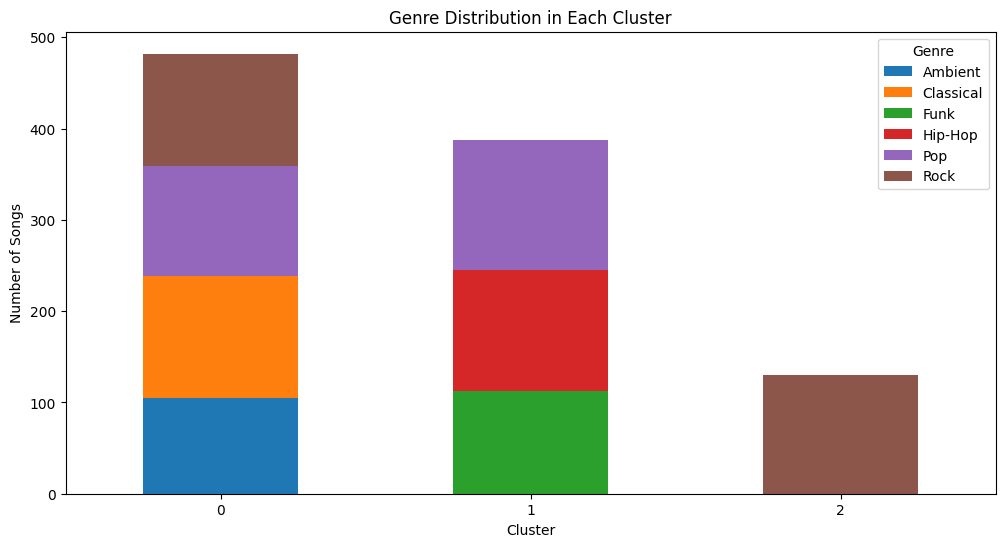

In [41]:
# Group by cluster and genre, and count the number of songs
genre_distribution = data.groupby(['Cluster', 'Genre']).size().unstack(fill_value=0)

# Display the genre distribution
print("Genre distribution in each cluster:")
print(genre_distribution)

# Plot the genre distribution
genre_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Genre Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()

In [42]:
# b. Mood Distribution in Each Cluster

Mood distribution in each cluster:
Mood     Calm  Emotional  Energetic  Joyful  Melancholic  Powerful  Soothing
Cluster                                                                     
0         105        123          0       0          120         0       134
1           0          0        113     143            0       132         0
2           0          0        130       0            0         0         0


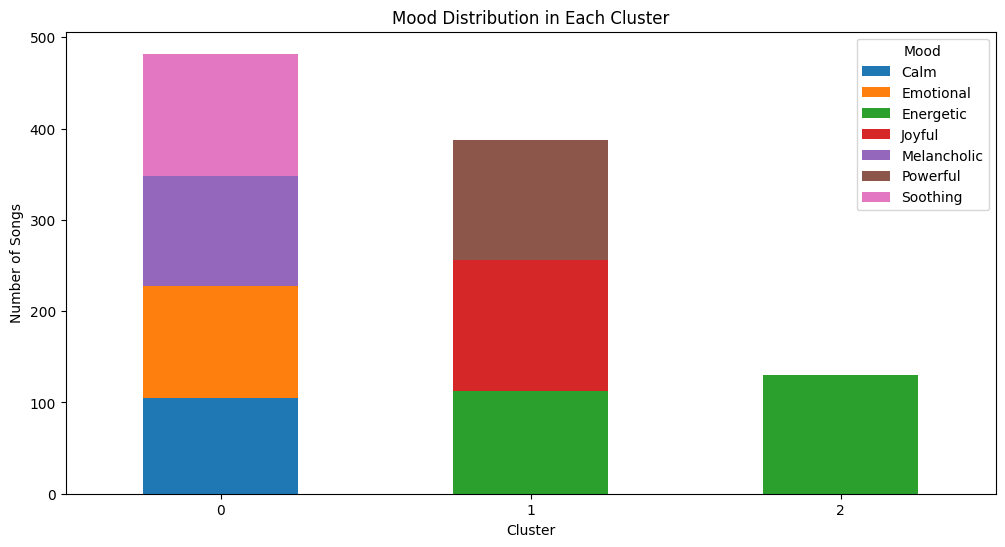

In [43]:
# Group by cluster and mood, and count the number of songs
mood_distribution = data.groupby(['Cluster', 'Mood']).size().unstack(fill_value=0)

# Display the mood distribution
print("Mood distribution in each cluster:")
print(mood_distribution)

# Plot the mood distribution
mood_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Mood Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()

In [44]:
# c. Sentiment Label Distribution in Each Cluster

Sentiment distribution in each cluster:
Sentiment_Label  Happy  Motivated  Relaxed  Sad
Cluster                                        
0                    0          0      239  243
1                  256        132        0    0
2                    0        130        0    0


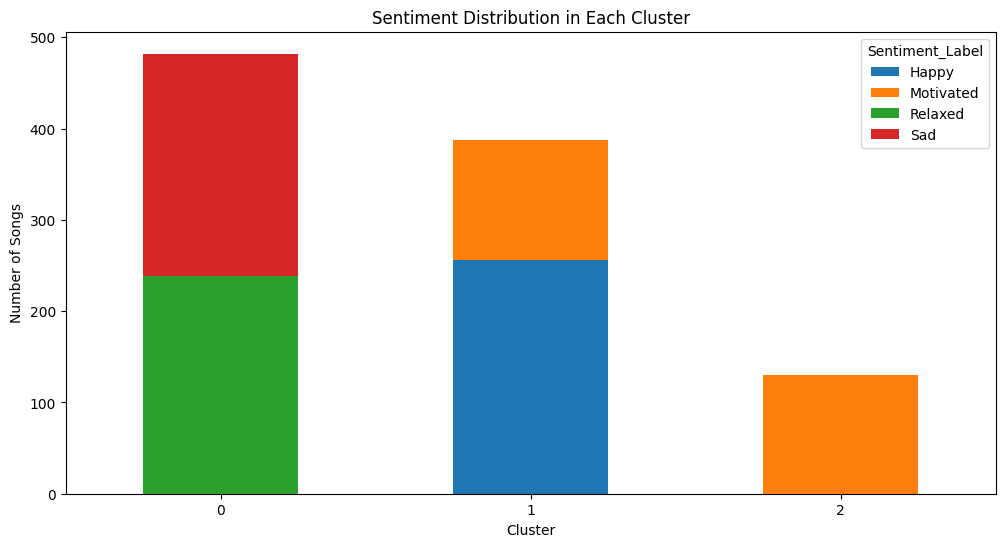

In [45]:
# Group by cluster and sentiment label, and count the number of songs
sentiment_distribution = data.groupby(['Cluster', 'Sentiment_Label']).size().unstack(fill_value=0)

# Display the sentiment distribution
print("Sentiment distribution in each cluster:")
print(sentiment_distribution)

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()

In [46]:
# Visualize the Clusters in 3D

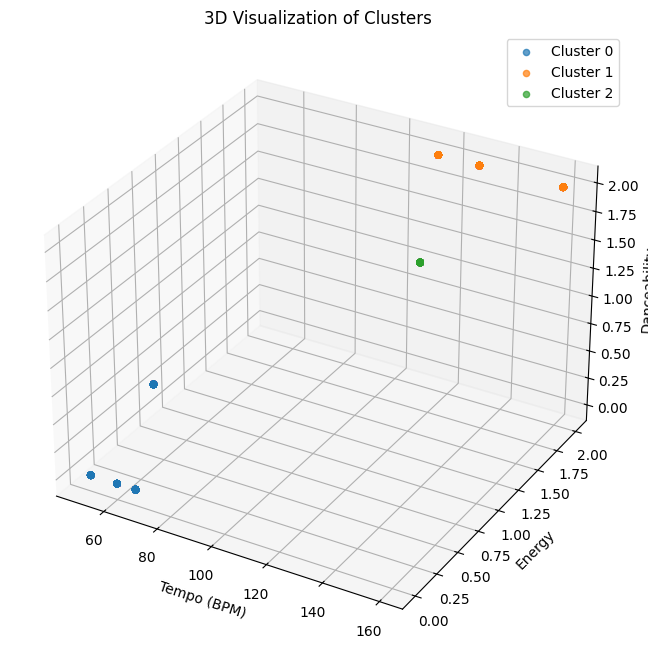

In [48]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]

    # Convert 'Energy' and 'Danceability' to numerical representations for plotting
    energy_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
    danceability_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

    # Map the values in the cluster_data DataFrame
    energy_num = cluster_data['Energy'].map(energy_mapping)
    danceability_num = cluster_data['Danceability'].map(danceability_mapping)

    ax.scatter(cluster_data['Tempo (BPM)'], energy_num, danceability_num,
               label=f'Cluster {cluster}', alpha=0.7)

# Set labels and title
ax.set_xlabel('Tempo (BPM)')
ax.set_ylabel('Energy')
ax.set_zlabel('Danceability')
ax.set_title('3D Visualization of Clusters')
ax.legend()

plt.show()

In [49]:
# Interpret the Results:

# Based on the analysis, we can interpret the clusters as follows:

# Cluster 0:

# Characteristics: Low tempo, low energy, low danceability.

# Genre: Likely dominated by genres like Classical or Ambient.

# Mood: Soothing, Calm, Melancholic.

# Sentiment: Mostly Sad or Relaxed.

# Cluster 1:

# Characteristics: High tempo, high energy, high danceability.

# Genre: Likely dominated by genres like Pop, Funk, or Hip-Hop.

# Mood: Joyful, Energetic.

# Sentiment: Mostly Happy or Motivated.

# Cluster 2:

# Characteristics: Moderate tempo, energy, and danceability.

# Genre: Likely a mix of genres like Rock or Pop.

# Mood: Balanced, Emotional.

# Sentiment: A mix of Happy, Sad, and Relaxed.

In [50]:
# Save the clustered data to a new CSV file
data.to_csv('clustered_music_sentiment_dataset_with_analysis.csv', index=False)